In [57]:
import pandas as pd
df = pd.read_csv("../dataset/train.csv")  
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [58]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [59]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [60]:
missing=df.isnull().sum()

In [61]:
print(missing[missing > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [62]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [64]:
missing=df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


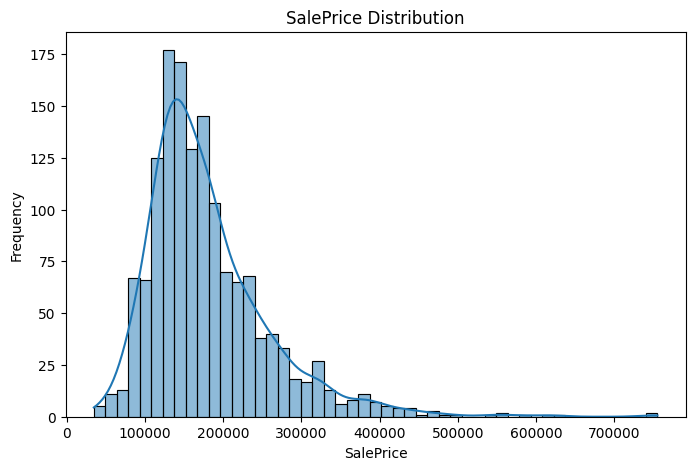

In [65]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

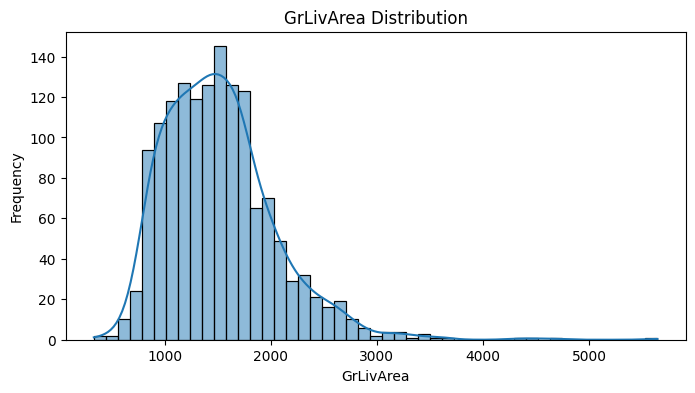

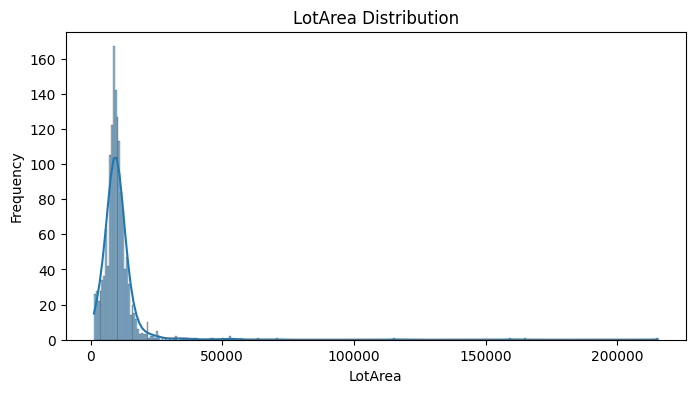

In [66]:
features = ['GrLivArea', 'LotArea']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

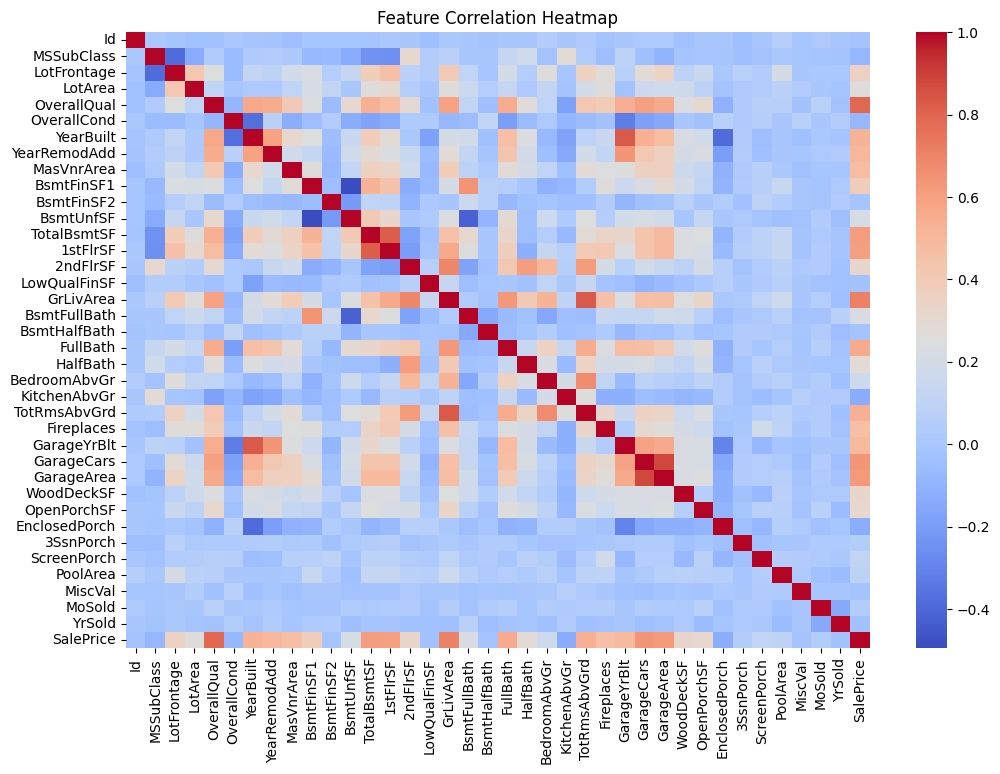

In [67]:
plt.figure(figsize=(12,8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


In [68]:
import pandas as pd


missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Columns with missing values:\n", missing)


Columns with missing values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [69]:
cols_to_drop = ["PoolQC", "MiscFeature", "Alley", "Fence"]
df.drop(columns=cols_to_drop, inplace=True)


In [70]:
df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"].median())
df["MasVnrArea"]=df["MasVnrArea"].fillna(df["MasVnrArea"].median())


In [71]:
for col in ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]:
     df[col]=df[col].fillna("None")

for col in ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]:
    df[col]= df[col].fillna("None")

df["MasVnrType"]=df["MasVnrType"].fillna("None")


In [72]:
df["Electrical"]=df["Electrical"].fillna(df["Electrical"].mode()[0])


In [73]:
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(0)


In [74]:
df["FireplaceQu"]=df["FireplaceQu"].fillna("None")


In [75]:
print(df.isnull().sum().sort_values(ascending=False).head())


Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
dtype: int64


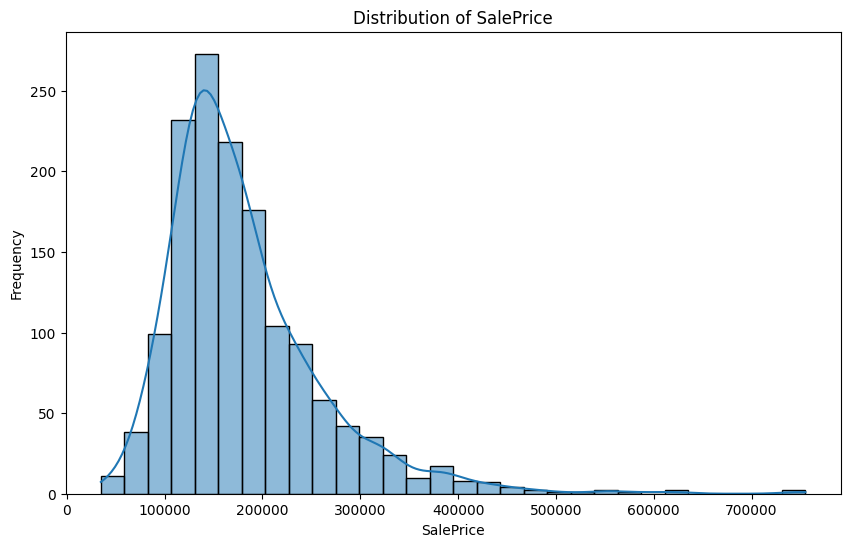

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df["SalePrice"], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


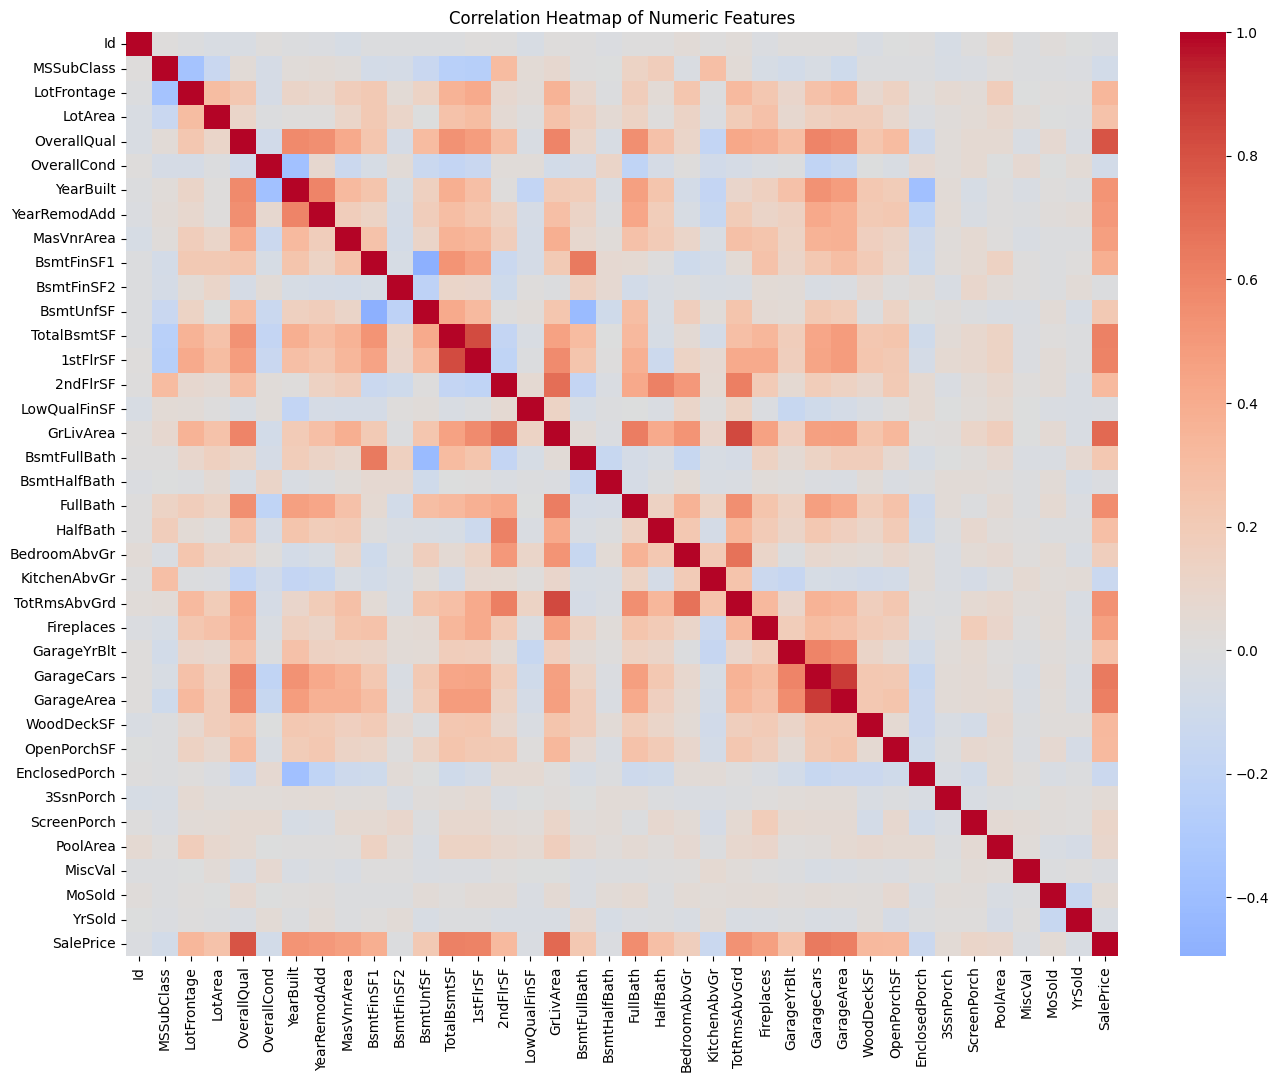

In [77]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [78]:
print(corr["SalePrice"].sort_values(ascending=False).head(11))  # top 10 + SalePrice itself


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


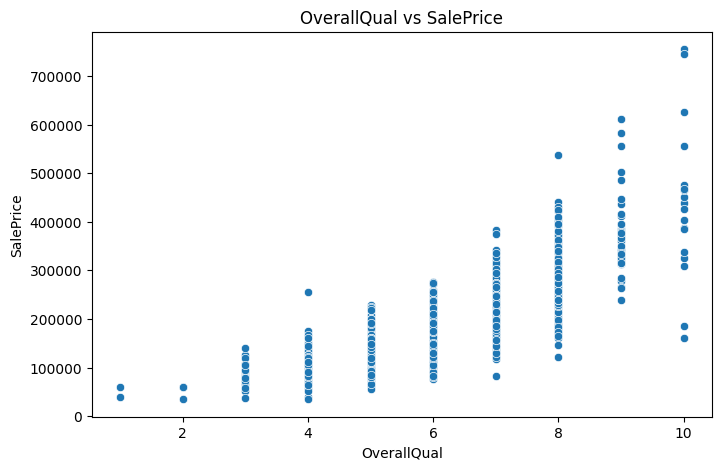

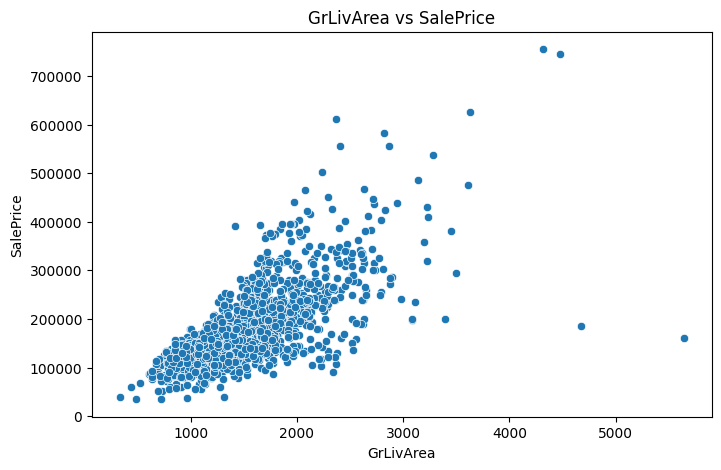

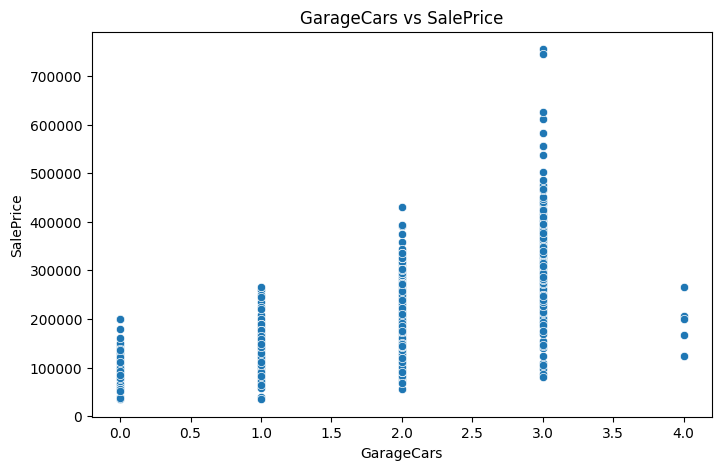

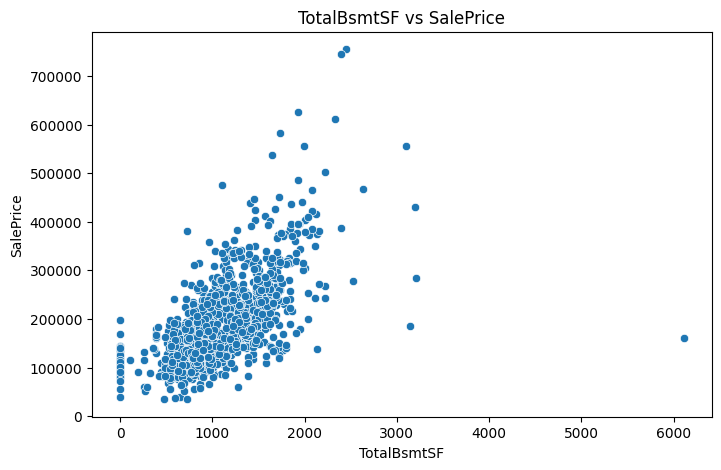

In [79]:
important_features = ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF"]

for feature in important_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df["SalePrice"])
    plt.title(f"{feature} vs SalePrice")
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()


In [80]:
correlations = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)

print(correlations.head(10))
print(correlations.tail(5))


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [81]:
cat_features = df.select_dtypes(include='object').columns
print(cat_features)


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [82]:
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)


In [83]:
print("Encoded DataFrame shape:", df_encoded.shape)


Encoded DataFrame shape: (1460, 248)


In [84]:
print("Missing values after encoding:", df_encoded.isnull().sum().sum())


Missing values after encoding: 0


In [85]:
selected_features = [
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea",
    "TotalBsmtSF", "1stFlrSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "OpenPorchSF",
    "LotFrontage", "GarageYrBlt", "MasVnrArea", "HalfBath", "LotArea",
    "YearRemodAdd", "Fireplaces", "BsmtFullBath", "WoodDeckSF", "BsmtUnfSF", "2ndFlrSF", "BsmtFinSF1",
]

X = df[selected_features]
y = df["SalePrice"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1460, 22)
Target shape: (1460,)


In [86]:
correlations = X.corrwith(y).abs()

In [87]:

important_features = correlations[correlations >= 0.2].index

X_reduced = X[important_features]

print(f"Reduced features shape: {X_reduced.shape}")


Reduced features shape: (1460, 22)


In [88]:
from sklearn.model_selection import train_test_split

# Use 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

print("Train features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Train target shape:", y_train.shape)
print("Test target shape:", y_test.shape)


Train features shape: (1168, 22)
Test features shape: (292, 22)
Train target shape: (1168,)
Test target shape: (292,)


In [89]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [90]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Train RMSE: 35318.03
Test RMSE: 37890.99
Train R²: 0.7909
Test R²: 0.8128


In [91]:
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

train_rmse_ridge = root_mean_squared_error(y_train, y_train_pred_ridge)
test_rmse_ridge = root_mean_squared_error(y_test, y_test_pred_ridge)

train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"Ridge Train RMSE: {train_rmse_ridge:.2f}")
print(f"Ridge Test RMSE: {test_rmse_ridge:.2f}")
print(f"Ridge Train R²: {train_r2_ridge:.4f}")
print(f"Ridge Test R²: {test_r2_ridge:.4f}")


Ridge Train RMSE: 35320.98
Ridge Test RMSE: 37840.74
Ridge Train R²: 0.7908
Ridge Test R²: 0.8133


In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import root_mean_squared_error, r2_score
# Create pipeline: scale -> lasso
pipeline = make_pipeline(
    StandardScaler(),
    LassoCV(alphas=np.logspace(-4, 0, 50), cv=5, max_iter=15000, random_state=42)
)

pipeline.fit(X_train, y_train)

# Predict
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(X_test)

train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)

train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"LassoCV + Scaling Train RMSE: {train_rmse:.2f}")
print(f"LassoCV + Scaling Test RMSE: {test_rmse:.2f}")
print(f"LassoCV + Scaling Train R²: {train_r2:.4f}")
print(f"LassoCV + Scaling Test R²: {test_r2:.4f}")


LassoCV + Scaling Train RMSE: 35318.03
LassoCV + Scaling Test RMSE: 37891.57
LassoCV + Scaling Train R²: 0.7909
LassoCV + Scaling Test R²: 0.8128


In [93]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoder.fit(X_train)
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)
scaler = StandardScaler()
scaler.fit(X_train_encoded)
X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [94]:
from sklearn.linear_model import LassoCV

final_model = LassoCV(alphas=None, cv=5, max_iter=5000, random_state=42)
final_model.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

train_preds = final_model.predict(X_train_scaled)
test_preds = final_model.predict(X_test_scaled)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Train RMSE: 21332.22
Test RMSE: 40925.69
Train R²: 0.9237
Test R²: 0.7816


In [95]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV

num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


In [96]:
final_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LassoCV(max_iter=10000))
])


In [97]:
final_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'OpenPorchSF',
       'LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'HalfBath', 'LotArea',
       'YearRemodAdd', 'Fireplaces', 'BsmtFullBath', 'WoodDeckSF', 'BsmtUnfSF',
       '2ndFlrSF', 'BsmtFinSF1'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))])),
                ('model', LassoCV(max_iter=10000))])

In [98]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict
y_train_pred = final_pipeline.predict(X_train)
y_test_pred = final_pipeline.predict(X_test)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Final Pipeline Train RMSE: {train_rmse:.2f}")
print(f"Final Pipeline Test RMSE: {test_rmse:.2f}")
print(f"Final Pipeline Train R²: {train_r2:.4f}")
print(f"Final Pipeline Test R²: {test_r2:.4f}")


Final Pipeline Train RMSE: 35440.20
Final Pipeline Test RMSE: 38115.98
Final Pipeline Train R²: 0.7894
Final Pipeline Test R²: 0.8106


In [101]:
import joblib
joblib.dump(final_pipeline, 'final_model_pipeline.pkl')


['final_model_pipeline.pkl']

In [100]:
import joblib
import pandas as pd
loaded_pipeline = joblib.load('final_model_pipeline.pkl')

sample = pd.DataFrame({
    "OverallQual": [7],
    "GrLivArea": [2000],
    "GarageCars": [2],
    "GarageArea": [500],
    "TotalBsmtSF": [1000],
    "1stFlrSF": [1200],
    "FullBath": [2],
    "TotRmsAbvGrd": [7],
    "YearBuilt": [2005],
    "OpenPorchSF": [50],
    "LotFrontage": [80],
    "GarageYrBlt": [2005],
    "MasVnrArea": [200],
    "HalfBath": [1],
    "LotArea": [8000],
    "YearRemodAdd": [2005],
    "Fireplaces": [1],
    "BsmtFullBath": [1],
    "WoodDeckSF": [100],
    "BsmtUnfSF": [300],
    "2ndFlrSF": [800],
    "BsmtFinSF1": [400],

})


predicted_price = loaded_pipeline.predict(sample)
print("Predicted Sale Price:", predicted_price)


Predicted Sale Price: [237817.11432845]
